# Assignmet 2

Loading libraries

In [20]:
import pickle
import json
import numpy as np
import networkx as nx
import fa2_modified as fa2
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict
import community.community_louvain as community
from networkx.algorithms.community.quality import modularity

## Part 1: Genres and communities and plotting 

> **Write about genres and modularity.**


* Modularity quantifies how well a network is divided into communities by comparing the density of edges inside communities to edges between communities. High modularity values indicate that there are more connections within communities than would be expected in a random network with the same node degree distribution. This makes modularity a useful metric for identifying meaningful communities in networks.

* In the context of country music artists we are going to analyse a previously created network extracting the data from Wikipedia. Then we analyse the communities of the netwrok based on the first genre of the artist.

> **Detect the communities, discuss the value of modularity in comparison to the genres.**

In [21]:
def load_artist_genres_dict():
    artist_genres_dict = {}
    with open('artists_genres_dictionary.txt', 'r') as f:
        artist_genres_dict = json.load(f)
    return artist_genres_dict

artists = load_artist_genres_dict()

In [22]:
# Load the graph from the pickle file
with open('../lab5/artist_graph.pkl', 'rb') as f:
    G = pickle.load(f)

# make the graph undirected
G = G.to_undirected()

rm_nodes = []

# filter the network to only include nodes that are in the artist_genres_dict
for node in G.nodes():
    if node.replace('_', ' ') in artists.keys():
        if artists[node.replace('_', ' ')][0] != 'country' or len(artists[node.replace('_', ' ')]) == 1:
            G.nodes[node]['genre'] = artists[node.replace('_', ' ')][0]
        else:
            G.nodes[node]['genre'] = artists[node.replace('_', ' ')][1]
    else:
        rm_nodes.append(node)

for node in rm_nodes:
    G.remove_node(node)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(G.nodes(data=True))

Number of nodes: 1829
Number of edges: 14060
[('Haley_&_Michaels', {'len_content': 1370, 'genre': 'country'}), ('Dickey_Betts', {'len_content': 4911, 'genre': 'rock'}), ('Two_Tons_of_Steel', {'len_content': 522, 'genre': 'alternative country'}), ('Bacon_Brothers', {'len_content': 101, 'genre': 'country rock'}), ('Cledus_T._Judd', {'len_content': 5373, 'genre': 'parody'}), ('Charlie_Major', {'len_content': 932, 'genre': 'country'}), ('Caryl_Mack_Parker', {'len_content': 752, 'genre': 'country'}), ('Tenille_Arts', {'len_content': 4681, 'genre': 'country'}), ('Tyler_Hubbard', {'len_content': 4453, 'genre': 'country pop'}), ('Steven_Lee_Olsen', {'len_content': 2802, 'genre': 'country'}), ('O._B._McClinton', {'len_content': 1789, 'genre': 'country'}), ('JT_Hodges', {'len_content': 1991, 'genre': 'country'}), ('Hank_Flamingo', {'len_content': 1029, 'genre': 'country'}), ('Shawn_Camp_(singer)', {'len_content': 1678, 'genre': 'bluegrass'}), ('Valerie_June', {'len_content': 4844, 'genre': 'amer

In [23]:
# Create a dictionary to hold communities based on the 'category' attribute
communities = defaultdict(list)

# Group nodes by the 'category' attribute
for node, data in G.nodes(data=True):
    category = data['genre']
    communities[category].append(node)

# Convert communities to a list of lists
communities_list = list(communities.values())

# Calculate modularity
mod = modularity(G, communities_list)
print(F"Modularity of the graph based on library: {mod}")

# calculate modularity based on equation
# M is the modularity.
# nc is the number of communities.
# Lc is the number of edges within community 
# L is the total number of edges in the graph.
# kc is the sum of the degrees of all nodes in community 
# Total number of edges in the graph
L = G.number_of_edges()

# Modularity calculation based on the given formula
M = 0
for c in communities_list:
    # Subgraph of the current community
    subgraph = G.subgraph(c)
    
    # L_c: Number of edges inside this community
    L_c = subgraph.number_of_edges()
    
    # k_c: Sum of the degrees of the nodes in this community
    k_c = sum(dict(G.degree(c)).values())
    
    # Apply the modularity formula
    M += (L_c / L) - (k_c / (2 * L))**2

# Print the modularity
print(f"Modularity based on formula: {M}")


Modularity of the graph based on library: 0.08427493732408757
Modularity based on formula: 0.08427493732408757


In [24]:
# first compute the best partition base on Louvain-algorithm
partition = community.best_partition(G)

# calculate the modularity of the partition
mod = community.modularity(partition, G)
print(F"Modularity of the partition by Louvain-algorithm: {mod}")

Modularity of the partition by Louvain-algorithm: 0.39038756123421464


## - Explain the comparison and talk about modularity value.

The higher is M for a partition, the better is the corresponding community structure. Therefore in our case since M is close to zero this means that there is almost only one community, and as mentioned in the teachers nb this is due to the fact that country is the first genre for most of the artists. If we removed this genre maybe the modularity gets better.

The value is higher that the one founded above, I believe because the Louvain algorithm compares different partitions and keeps the one with higher modularity.

> **Calculate the matrix $D$ and discuss your findings.**

In [25]:
# Graph with all genres
# Load the graph from the pickle file
with open('../lab5/artist_graph.pkl', 'rb') as f:
    G_all = pickle.load(f)

# make the graph undirected
G_all = G_all.to_undirected()
print(G_all.number_of_nodes())

rm_nodes = []

for node in G_all.nodes():
    if node.replace('_', ' ') in artists.keys():
        G_all.nodes[node]['genre'] = artists[node.replace('_', ' ')]
    else:
        rm_nodes.append(node)

for node in rm_nodes:
    G_all.remove_node(node)

print(G_all.number_of_nodes())
print(G_all.nodes(data=True))# 

2098
1829
[('Haley_&_Michaels', {'len_content': 1370, 'genre': ['country']}), ('Dickey_Betts', {'len_content': 4911, 'genre': ['rock', 'country', 'blues', 'jazz', 'southern rock', 'jam band']}), ('Two_Tons_of_Steel', {'len_content': 522, 'genre': ['country', 'alternative country', 'americana', 'rockabilly']}), ('Bacon_Brothers', {'len_content': 101, 'genre': ['country rock', 'folk rock']}), ('Cledus_T._Judd', {'len_content': 5373, 'genre': ['country', 'parody']}), ('Charlie_Major', {'len_content': 932, 'genre': ['country']}), ('Caryl_Mack_Parker', {'len_content': 752, 'genre': ['country']}), ('Tenille_Arts', {'len_content': 4681, 'genre': ['country']}), ('Tyler_Hubbard', {'len_content': 4453, 'genre': ['country', 'country pop', 'country rock']}), ('Steven_Lee_Olsen', {'len_content': 2802, 'genre': ['country']}), ('O._B._McClinton', {'len_content': 1789, 'genre': ['country']}), ('JT_Hodges', {'len_content': 1991, 'genre': ['country']}), ('Hank_Flamingo', {'len_content': 1029, 'genre': [

In [26]:
# Graph with all genres G_all

# Apply the Louvain algorithm to detect communities
partition = community.best_partition(G_all)

# Identify the 7 most common genres
genres = []
genres_1 = [data['genre'] for _, data in G_all.nodes(data=True)]
for i in range(len(genres_1)):
    for genre in genres_1[i]:
        genres.append(genre)

genre_counter = Counter(genres)
top_7_genres = [g for g, _ in genre_counter.most_common(7)]
print(top_7_genres)

# Identify the 7 largest communities
community_counter = Counter(partition.values())
top_7_communities = [c for c, _ in community_counter.most_common(7)]
print(top_7_communities)

# Initialize the confusion matrix (7 x 7)
confusion_matrix = np.zeros((7, 7), dtype=int)

# Populate the confusion matrix
for node, data in G_all.nodes(data=True):
    genre = data['genre']
    c = partition[node]

    # For all genres of a node
    # Check if the genre is in the top 7 genres and the community is in the top 7 communities
    for g in genre:
        if g in top_7_genres and c in top_7_communities:
            genre_idx = top_7_genres.index(g)
            community_idx = top_7_communities.index(c)
            confusion_matrix[genre_idx, community_idx] += 1

# Display the confusion matrix
print("Confusion Matrix (Genres x Communities):")
print(confusion_matrix)

['country', 'folk', 'country rock', 'americana', 'pop', 'bluegrass', 'rock']
[3, 5, 4, 2, 6, 1, 8]
Confusion Matrix (Genres x Communities):
[[421 352 334 198  69  73  22]
 [ 11  21  30  82  23  10   1]
 [ 57  36  15  39   7  12   4]
 [ 14   8  15  94  16   8   1]
 [ 53  22  45  24   4   5   2]
 [  9  24   7  27  58   2   0]
 [ 24  24  16  39   6   4   3]]


> **Plot the communities and comment on your results.**

In [27]:
# Group nodes by their community and calculate the size of each community
community_sizes = {}
for node, comm in partition.items():
    if comm not in community_sizes:
        community_sizes[comm] = 0
    community_sizes[comm] += 1

# Sort communities by size and get the largest 10 communities
largest_communities = sorted(community_sizes, key=community_sizes.get, reverse=True)[:10]

# Assign colors to nodes
# Color nodes in the largest communities with distinct colors, and others with a light gray color
node_colors = []
for node in G.nodes():
    c = partition[node]
    if c in largest_communities:
        # Assign a unique color to the community
        node_colors.append(largest_communities.index(c) / len(largest_communities))
    else:
        # Assign light gray to small communities
        node_colors.append(0.85)  # Light gray

# Apply the Force Atlas 2 algorithm to layout the graph
forceatlas2 = fa2.ForceAtlas2(
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # Linear distances between nodes
    adjustSizes=False,  # Don't account for node sizes
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,  # Tolerance for node overlapping
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0
)

# Get positions for nodes using Force Atlas 2
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

100%|██████████| 2000/2000 [02:14<00:00, 14.89it/s]

BarnesHut Approximation  took  14.54  seconds
Repulsion forces  took  115.44  seconds
Gravitational forces  took  0.37  seconds
Attraction forces  took  0.50  seconds
AdjustSpeedAndApplyForces step  took  1.63  seconds


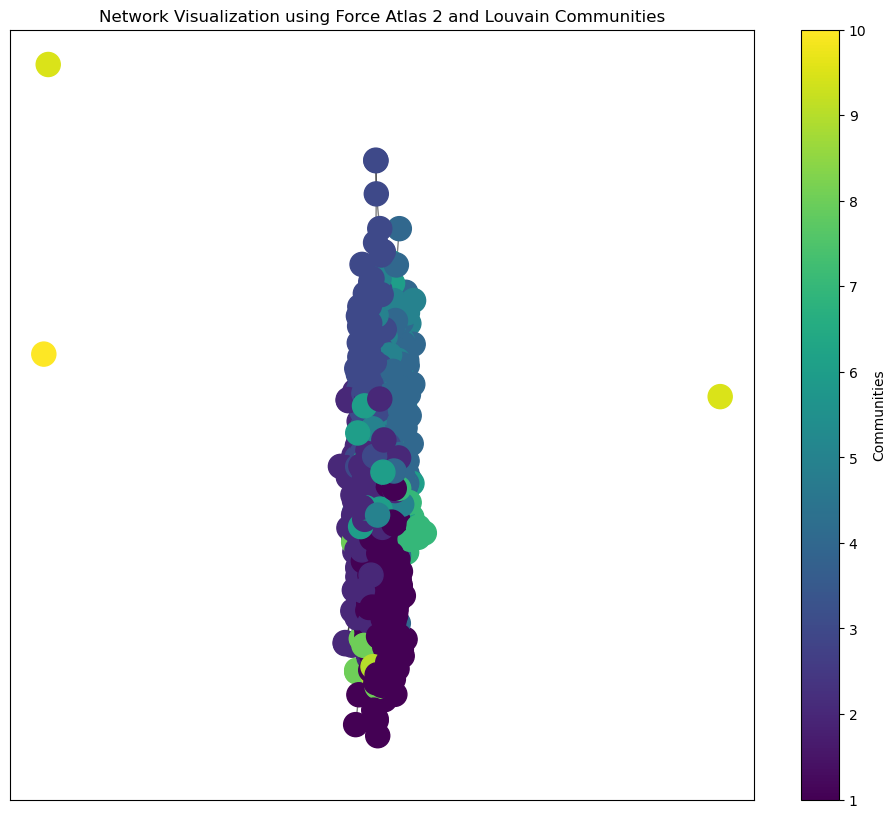

In [28]:
# set the colormap
cmap = plt.cm.viridis

# Create the scalar mappable (for the color bar)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(largest_communities)

# Plot the graph
fig, ax = plt.subplots(figsize=(12, 10))

# Draw nodes
nx.draw_networkx_nodes(G, positions, node_color=node_colors, cmap=cmap, node_size=300)

# Draw edges
nx.draw_networkx_edges(G, positions, alpha=0.5)

# Show plot
plt.title("Network Visualization using Force Atlas 2 and Louvain Communities")

# Add the color bar to the specific axis
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Communities', color='black')  # Color of the color bar label

ax.tick_params(colors='black')

plt.show()

## - Comment results

## Part 2: TF-IDF to understand genres and communities

In [29]:
import os
import string
import nltk
import math
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alpie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

> **Explain the concept of TF-IDF in your own words and how it can help you understand the genres and communities.**

<div style="text-align: justify;">
TF-IDF stands for Term Frequency - Inverse Document Frequency. It’s a way to figure out which words in a bunch of documents (like a collection of articles or a set of web pages) are the most important or relevant.
</div>

## - Explain how it can help understand the genres and communities

> **Calculate and visualize TF-IDF for the genres and communities.**

In [30]:
# Get the top 15 genres
top_15_genres = [g for g, _ in genre_counter.most_common(15)]
print(top_15_genres)

# Just run once because it appends the data to the file
for node in G.nodes():
    genre = G.nodes[node]['genre']

    if genre in top_15_genres:
        # read the file with the node's name
        with open(f'../lab4/artist_data/{node}.txt', 'r') as f:
            data = f.read()
        
        # append the data to the genre txt file
        with open(f"genres/{genre.replace(' ', '_')}.txt", 'a') as f:
            f.write(data)

['country', 'folk', 'country rock', 'americana', 'pop', 'bluegrass', 'rock', 'country pop', 'gospel', 'rockabilly', 'blues', 'alternative country', 'folk rock', 'southern rock', 'rock and roll']


In [31]:
def calculate_tf_idf(input_folder, output_folder, num_documents=15):
    # Initialize lemmatizer and load stopwords
    lemmatizer = WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')

    # Define characters and syntax to filter
    quotes = ['``', "''", '’', '""', '“', '”']
    wiki_syntax = ['https', 'ref', 'url', 'n', 'wa', 'cite', "'s"]

    # n thinks
    n_scape = '\\n'

    # Initialize containers for TF and processed documents
    documents = {}      # To store the tokens of each document
    all_words = set()   # To store all unique words in the corpus

    # for every file in genres folder
    for filename in os.listdir(input_folder):
        # read the file
        with open(f'{input_folder}/{filename}', 'r') as f:
            data = f.read()
        
        # tokenize the data
        tokens = word_tokenize(data)
        print(f"total token in doc: {len(tokens)}")

        # remove punctuation and make all words lowercase
        tokens = [word.lower() for word in tokens if word not in string.punctuation]

        # lemmatize the words
        tokens = [lemmatizer.lemmatize(word).lower() for word in tokens]

        # remove stopwords
        tokens = [word for word in tokens if word not in stopwords]

        # remove words that are len 1
        tokens = [word for word in tokens if len(word) > 1]

        # remove quotes
        tokens = [word for word in tokens if word not in quotes]

        # remove \n
        tokens = [word for word in tokens if n_scape not in word]

        # remove urls
        tokens = [word for word in tokens if '/' not in word]
        tokens = [word for word in tokens if 'www' not in word]
        tokens = [word for word in tokens if 'url' not in word]

        # remove words that contain = 
        tokens = [word for word in tokens if '=' not in word]

        # remove words contains : 
        tokens = [word for word in tokens if ':' not in word]

        # remove wiki syntax
        tokens = [word for word in tokens if word not in wiki_syntax]

        # count the tokens
        token_counter = Counter(tokens)

        # remove words that appear less than 5 times
        token_counter = {token: count for token, count in token_counter.items() if count >= 5}

        # Calculate term frequencies (TF)
        total_words = len(tokens)
        print(f"total words after filtering: {total_words}")
        # # doc_tf = {token: count / total_words for token, count in token_counter.items()}
        # documents[filename[:-4]] = doc_tf  # Save without .txt extension
        # all_words.update(token_counter.keys())

        # save the tokens in the documents dictionary
        doc_tf = {}
        for token, count in token_counter.items():
            # calculate the frequency with .2f precision
            doc_tf[token] = count/total_words
            all_words.add(token)

        documents[filename[:-4]] = doc_tf

    idf = {}
    for word in all_words:
        # Count how many documents contain the word
        doc_count = sum(1 for doc in documents if word in doc)
        # to prevent division by zero
        idf[word] = math.log(num_documents / doc_count) if doc_count > 0 else 0

    # Calculate TF-IDF for each word in each document
    tf_idf = {}

    for doc_name, doc_tf in documents.items():
        doc_tf_idf = {}
        for word, tf in doc_tf.items():
            # Calculate TF-IDF for the word in the current document
            tf_idf_value = tf * idf[word]  # TF * IDF
            doc_tf_idf[word] = tf_idf_value
        tf_idf[doc_name] = doc_tf_idf

    # store the tf_idf in a file
    os.makedirs(output_folder, exist_ok=True)
    for doc_tf_idf, tf_idf_values in tf_idf.items():
        with open(f'{output_folder}/{doc_tf_idf}.txt', 'w') as f:
            for word, value in tf_idf_values.items():
                f.write(f"{word}   {value:.4f}\n")
    

In [32]:
calculate_tf_idf('genres', 'tf_idf_genres')

total token in doc: 405117


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\alpie/nltk_data'
    - 'c:\\Users\\alpie\\anaconda3\\nltk_data'
    - 'c:\\Users\\alpie\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\alpie\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\alpie\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Function to generate word cloud for a genre
def generate_wordcloud_for_genre(filename, input_folder, output_folder='wordclouds'):
    # Create a string with each word repeated based on its TF-IDF score
    word_string = ''
    
    # Read the genre file
    with open(f'{input_folder}/{filename}', 'r') as file:
        for line in file:
            word, tf_idf_value = line.split()
            tf_idf_value = float(tf_idf_value)

            # Repeat the word based on the TF-IDF score, rounded up to the nearest integer
            repeat_count = max(1, math.ceil(tf_idf_value))  # Use at least 1 if the score is very small
            word_string += (word + ' ') * repeat_count

    # Generate the word cloud
    wordcloud = WordCloud(collocations=False, background_color='white', width=800, height=600).generate(word_string)
    
    # # Create output folder if it doesn't exist
    # os.makedirs(output_folder, exist_ok=True)
    
    # # Save the word cloud as an image file
    # genre_name = os.path.splitext(filename)[0]  # Remove file extension to get genre name
    # wordcloud.to_file(f'{output_folder}/{genre_name}_wordcloud.png')
    
    # Optionally, display the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {filename[:-4]}')
    plt.show()

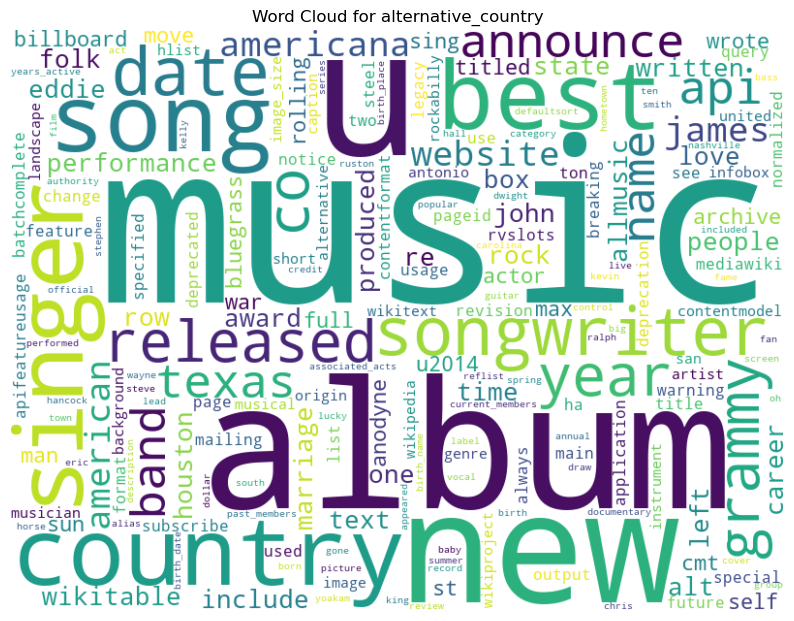

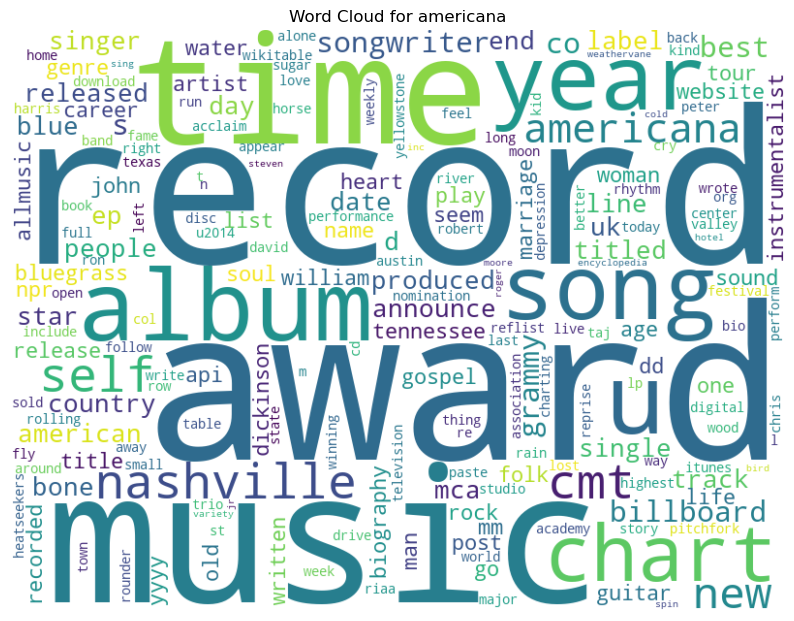

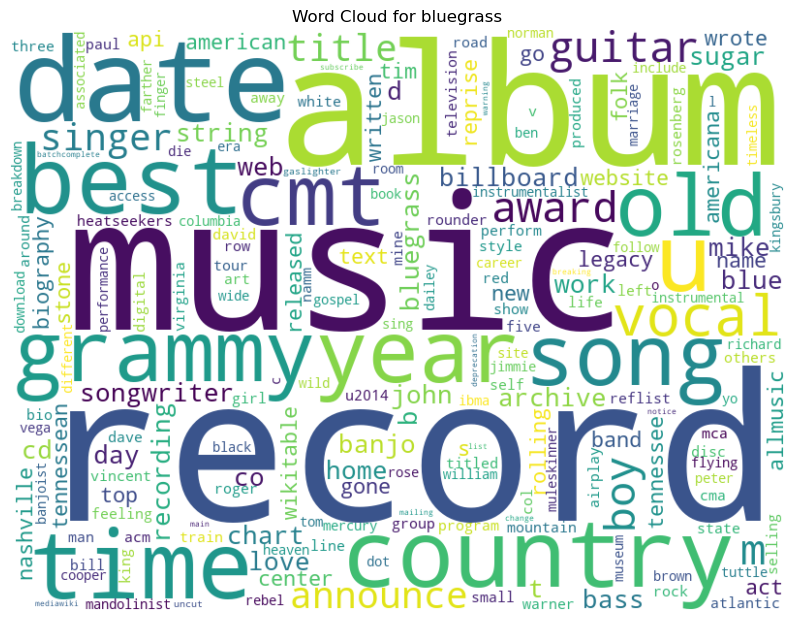

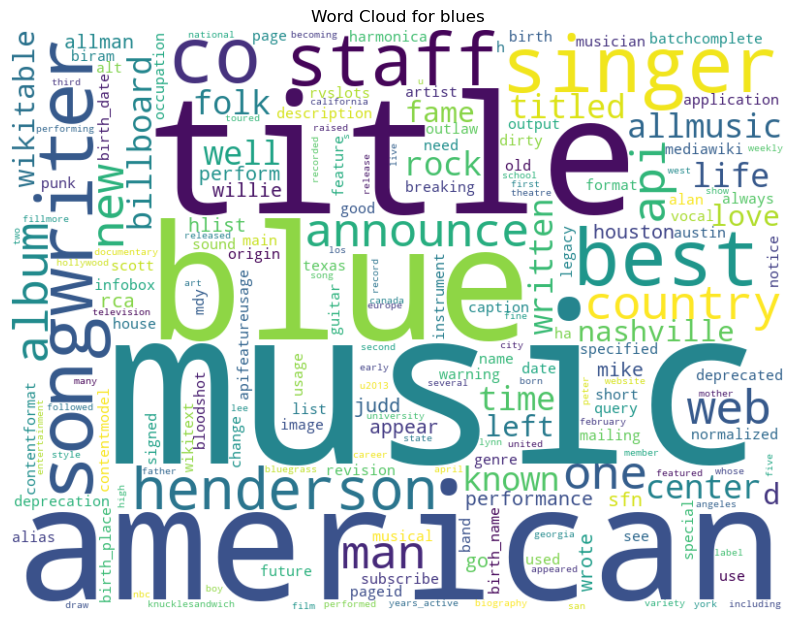

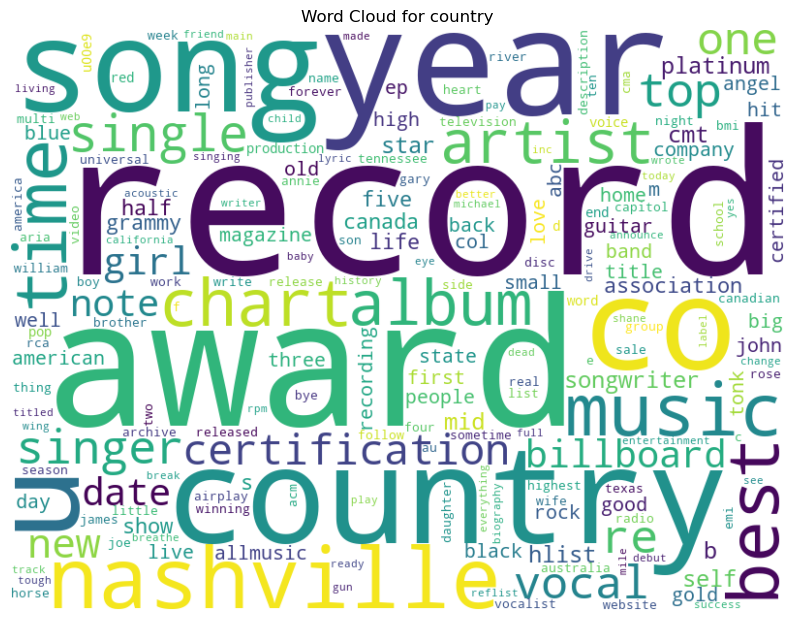

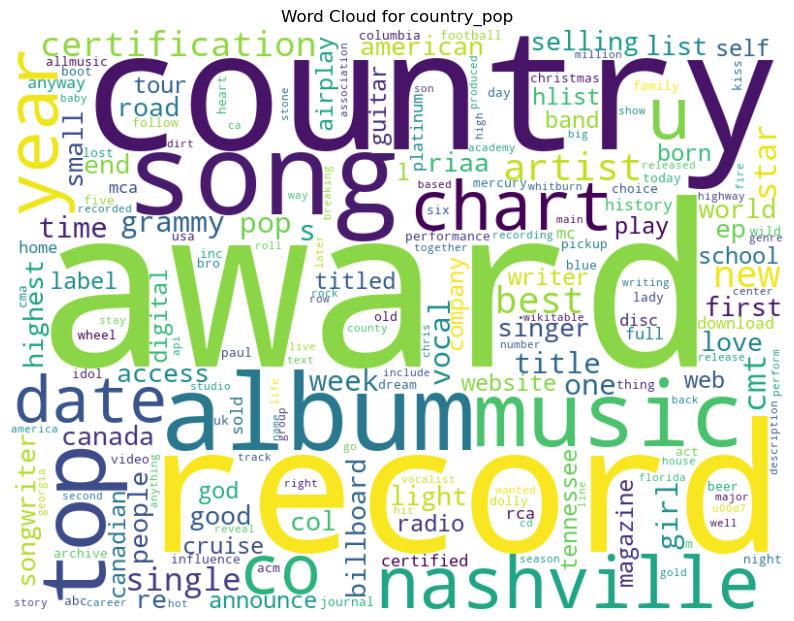

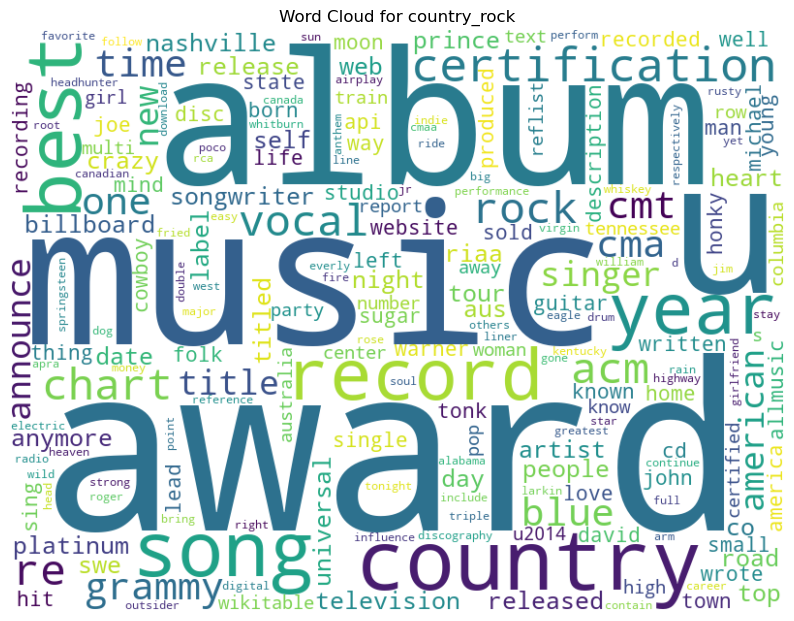

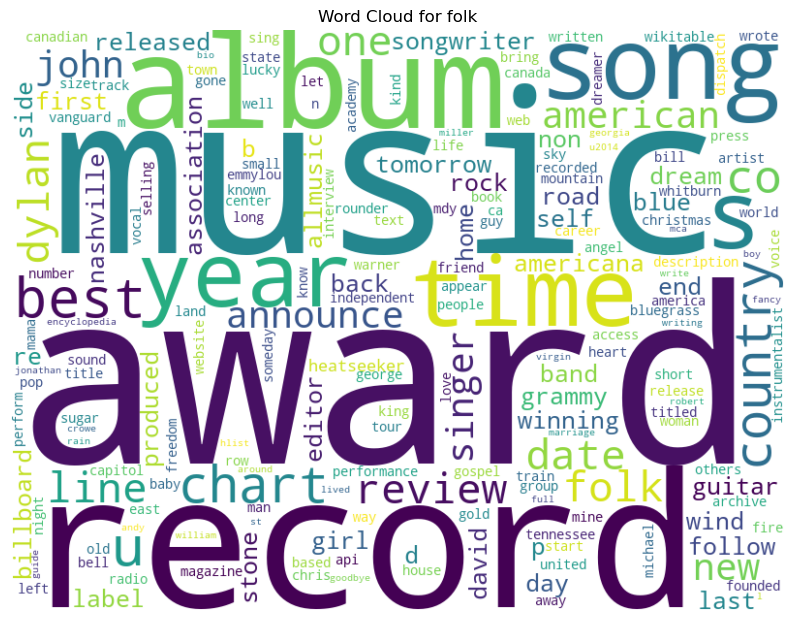

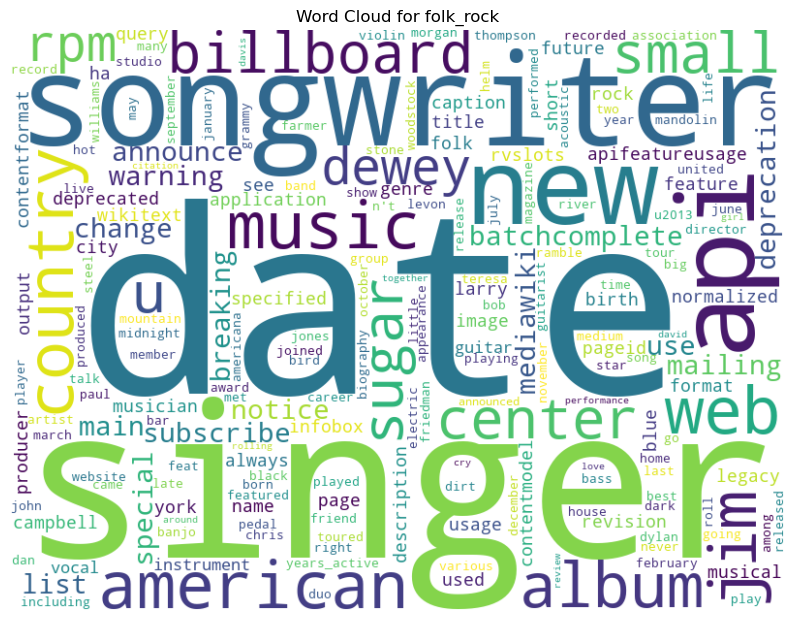

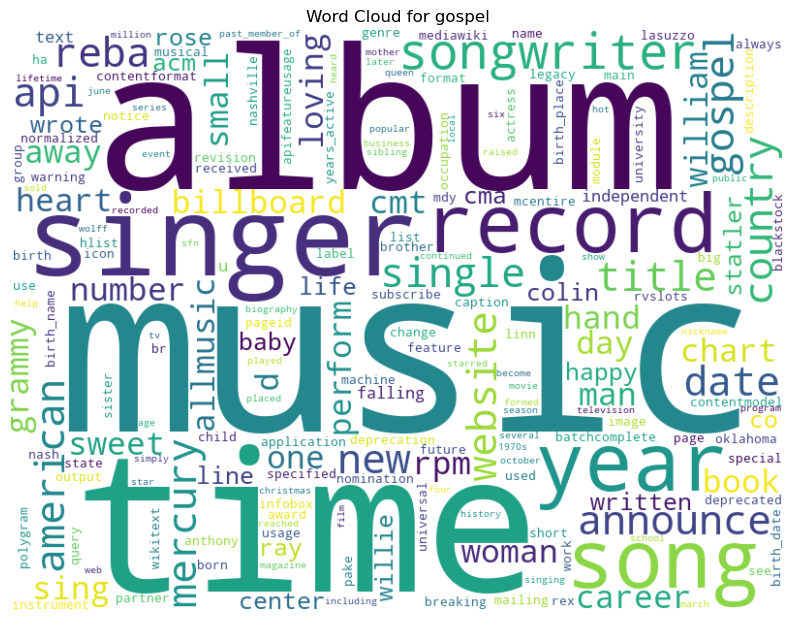

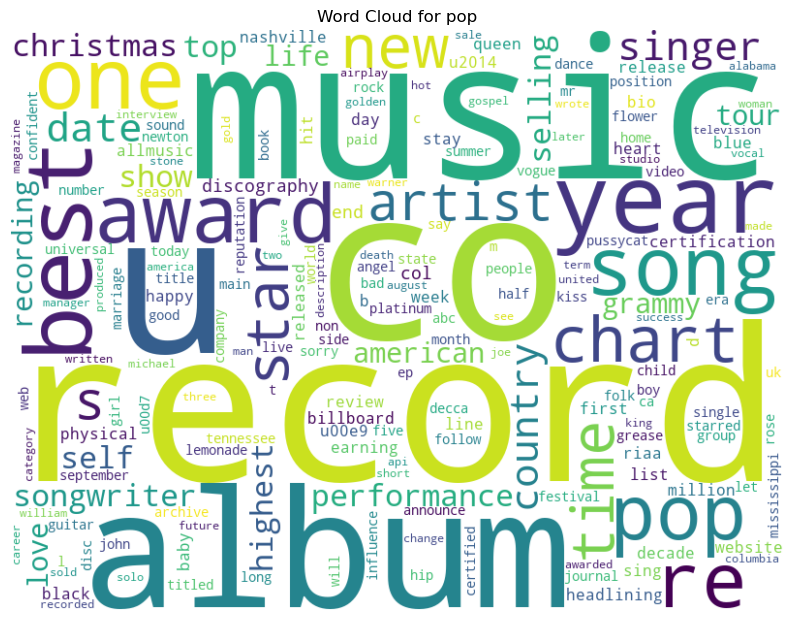

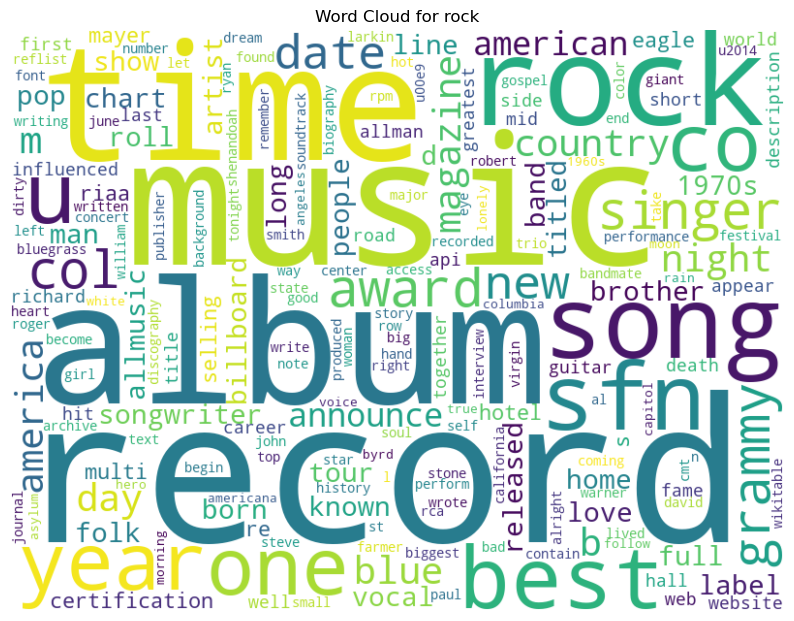

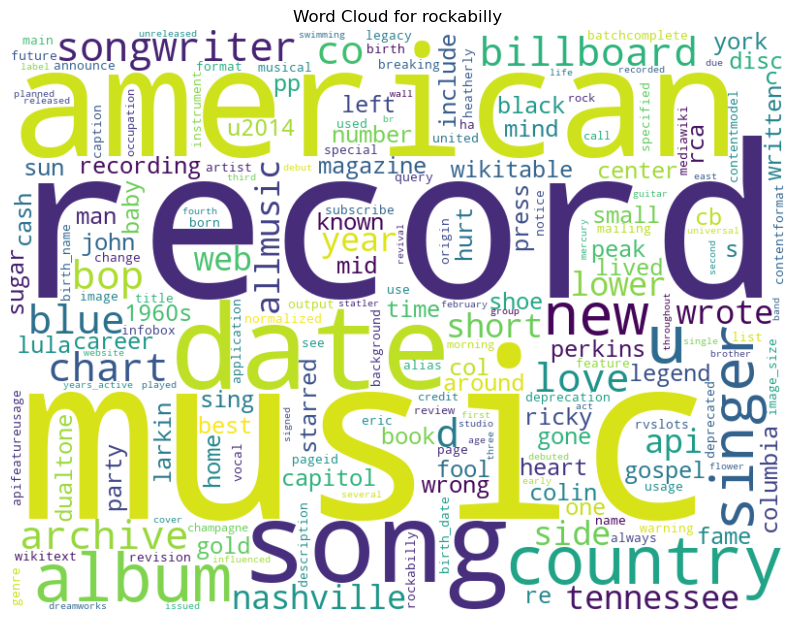

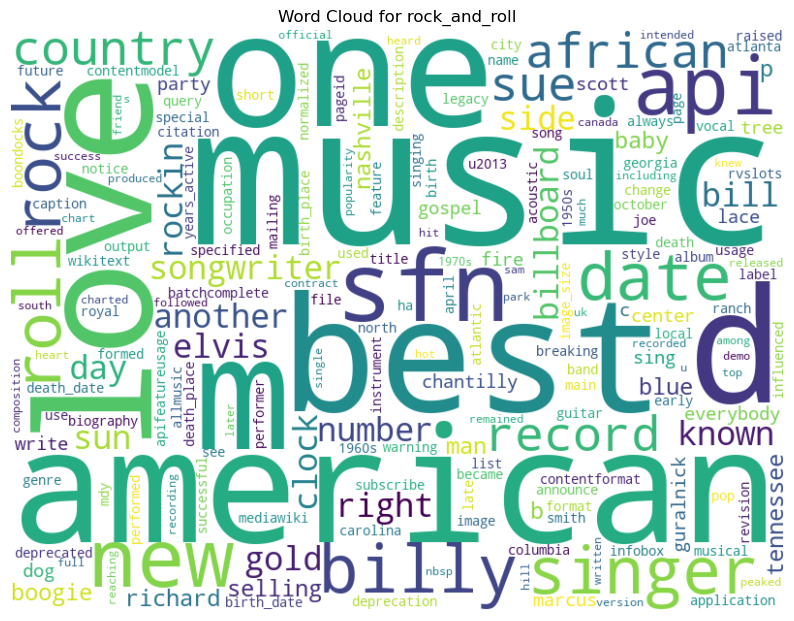

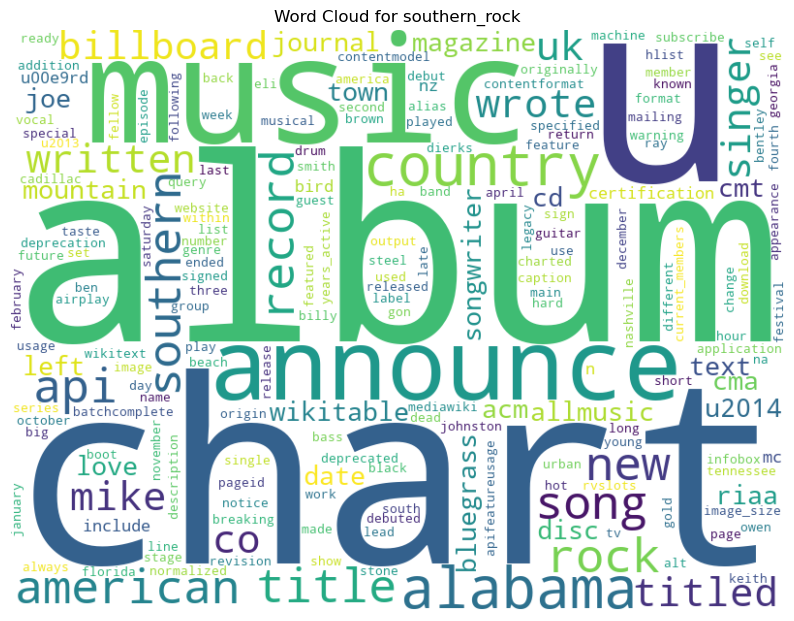

In [ ]:
folder = 'tf_idf_genres'

# Generate word clouds for each genre file in the 'tf_idf' folder
for genre_file in os.listdir(folder):
    if genre_file.endswith('.txt'):  # Make sure we're only processing text files
        generate_wordcloud_for_genre(genre_file, folder)

> **Use the matrix (Lecture 7, part 2) to dicusss the difference between the word-clouds between genres and communities.**

Calculate the sentiment of the Artists pages (OK to work with the sub-network of artists-with-genre) and describe your findings using stats and visualization, inspired by the first exercise of week 8.

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import defaultdict

#LabMT wordlist and genre data
labmt_df = pd.read_csv("DataSet.csv",delimiter=";")
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alpie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
with open("artists_genres_dictionary.txt", "r") as file:
    data = file.read()

#Convert the text into a dictionary
genres_dict = json.loads(data)


In [38]:
happiness_dict = dict(zip(labmt_df['word'], labmt_df['happiness_average']))

In [ ]:
#Calculate sentiment for each artist page based on genre keywords
def calculate_sentiment(tokens):
    scores = [happiness_dict[token] for token in tokens if token in happiness_dict]
    return sum(scores) / len(scores) if scores else 0

node_sentiments = {}
for artist, genres in genres_dict.items():
    tokens = word_tokenize(" ".join(genres).lower())
    sentiment = calculate_sentiment(tokens)
    node_sentiments[artist] = sentiment

In [ ]:
#Sentiment values and calculate statistics
sentiment_values = list(node_sentiments.values())
avg_sentiment = np.mean(sentiment_values)
median_sentiment = np.median(sentiment_values)
variance_sentiment = np.var(sentiment_values)
percentile_25 = np.percentile(sentiment_values, 25)
percentile_75 = np.percentile(sentiment_values, 75)

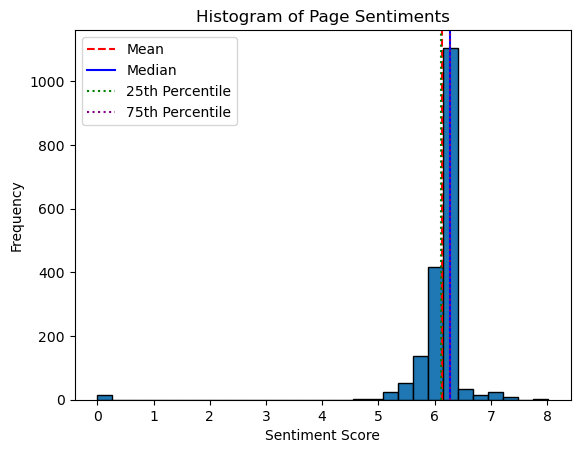

In [41]:
plt.hist(sentiment_values, bins=30, edgecolor='black')
plt.axvline(avg_sentiment, color='red', linestyle='--', label='Mean')
plt.axvline(median_sentiment, color='blue', linestyle='-', label='Median')
plt.axvline(percentile_25, color='green', linestyle=':', label='25th Percentile')
plt.axvline(percentile_75, color='purple', linestyle=':', label='75th Percentile')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Page Sentiments")
plt.show()

In [42]:
sorted_sentiments = sorted(node_sentiments.items(), key=lambda x: x[1])
saddest_artists = sorted_sentiments[:10]
happiest_artists = sorted_sentiments[-10:]

print("Top 10 Saddest Artists: \n", saddest_artists)
print("Top 10 Happiest Artists: \n", happiest_artists)

Top 10 Saddest Artists: 
 [('Alecia Nugent', 0), ('Buckwheat Zydeco', 0), ('John Bunzow', 0), ('John Duffey', 0), ('Nashville Bluegrass Band', 0), ('Osborne Brothers', 0), ('Rick Shea', 0), ('Rob Baird', 0), ('Run C&W', 0), ('Sierra Hull', 0)]
Top 10 Happiest Artists: 
 [('Jimmy Gaudreau', 7.364), ('Bill Engvall', 7.413333333333334), ('Bill Carlisle', 7.426666666666667), ('Kacey Jones', 7.426666666666667), ('Larry Stephenson', 7.44), ('Melonie Cannon', 7.44), ('Randy Kohrs', 7.44), ('Roba Stanley', 7.44), ('Uncle Dave Macon', 8.02), ('Uncle Earl', 8.02)]


This histogram provides an interesting view of the sentiment distribution across artist pages in the network. Most of the sentiment scores are clustered tightly around a narrow range near the mean and median, which both hover around a score of 6. This suggests that the majority of artists' pages have a fairly neutral to mildly positive sentiment.

The variance is low, as shown by the narrow spread in the central cluster, indicating that there isn’t much variation in sentiment across most artist pages. The 25th and 75th percentiles are also close to the mean, reinforcing this trend.

However, there are a few outliers on both ends of the sentiment scale. A small number of artists have significantly lower sentiment scores, possibly due to genres or topics associated with darker themes. On the other end, a handful of artists have higher scores, indicating more upbeat content or associations with genres that evoke positive feelings.

Community 3 (Reba_McEntire, Keith_Urban, Brooks_&_Dunn): Avg Sentiment = 6.0586
Community 5 (Vince_Gill, George_Strait, Garth_Brooks): Avg Sentiment = 6.2178
Community 4 (Johnny_Cash, Merle_Haggard, Elvis_Presley): Avg Sentiment = 0.0000
Community 2 (Willie_Nelson, Emmylou_Harris, Bob_Dylan): Avg Sentiment = 6.0875
Community 6 (Marty_Stuart, Ricky_Skaggs, Earl_Scruggs): Avg Sentiment = 6.0500
Community 1 (Waylon_Jennings, Kris_Kristofferson, Tanya_Tucker): Avg Sentiment = 6.2800
Community 8 (Beccy_Cole, Tommy_Emmanuel, Troy_Cassar-Daley): Avg Sentiment = 0.0000
Community 7 (Sean_Hogan, Chad_Brock, Beverley_Mahood): Avg Sentiment = 0.0000
Community 9 (George_Canyon, Aaron_Pritchett, One_More_Girl): Avg Sentiment = 0.0000
Community 10 (honeyhoney): Avg Sentiment = 6.0050

Three Saddest Communities:
Johnny_Cash, Merle_Haggard, Elvis_Presley: Avg Sentiment = 0.0000
Beccy_Cole, Tommy_Emmanuel, Troy_Cassar-Daley: Avg Sentiment = 0.0000
Sean_Hogan, Chad_Brock, Beverley_Mahood: Avg Sentiment =

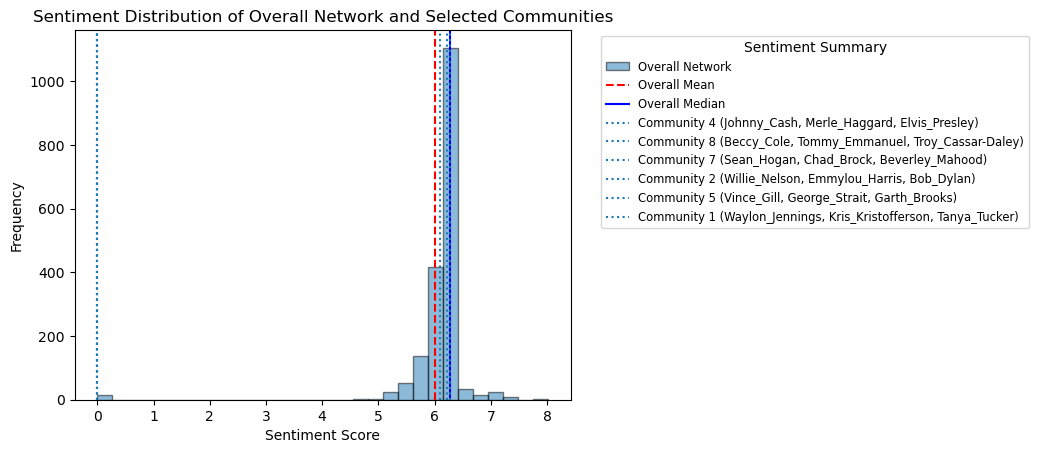

In [ ]:
# Count nodes in each community
community_counts = Counter(partition.values())
top_10_communities = [c for c, _ in community_counts.most_common(10)]

#Calculate average sentiment for each community
community_sentiments = {}
for community in top_10_communities:
    #Collect all nodes in the community
    community_nodes = [node for node, comm in partition.items() if comm == community]
    
    #Calculate average sentiment for the community
    sentiments = [node_sentiments[node] for node in community_nodes if node in node_sentiments]
    avg_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0
    community_sentiments[community] = avg_sentiment


community_names = {}
for community in top_10_communities:
    #Get nodes in the community
    community_nodes = [node for node, comm in partition.items() if comm == community]
    
    #Sort nodes by degree
    top_nodes = sorted(community_nodes, key=lambda x: G.degree[x], reverse=True)[:3]
    community_names[community] = ", ".join(top_nodes)

for community, name in community_names.items():
    print(f"Community {community} ({name}): Avg Sentiment = {community_sentiments[community]:.4f}")

#Determine the happiest and saddest communities
sorted_communities = sorted(community_sentiments.items(), key=lambda x: x[1])

#Happiest and saddest communities
saddest_communities = sorted_communities[:3]
happiest_communities = sorted_communities[-3:]

print("\nThree Saddest Communities:")
for community, sentiment in saddest_communities:
    print(f"{community_names[community]}: Avg Sentiment = {sentiment:.4f}")

print("\nThree Happiest Communities:")
for community, sentiment in happiest_communities:
    print(f"{community_names[community]}: Avg Sentiment = {sentiment:.4f}")

#Compare to overall sentiment
print(f"\nOverall Network Average Sentiment: {avg_sentiment:.4f}")
print(f"Overall Network Median Sentiment: {median_sentiment:.4f}")


plt.hist(sentiment_values, bins=30, edgecolor='black', alpha=0.5, label='Overall Network')
plt.axvline(avg_sentiment, color='red', linestyle='--', label='Overall Mean')
plt.axvline(median_sentiment, color='blue', linestyle='-', label='Overall Median')

#Add sentiment lines for each of the happiest and saddest communities
for community, sentiment in saddest_communities + happiest_communities:
    plt.axvline(community_sentiments[community], linestyle=':', label=f"Community {community} ({community_names[community]})")

plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Distribution of Overall Network and Selected Communities")

#Adjust the legend to be outside of the plot and more readable
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title="Sentiment Summary")

plt.show()


Q:Discuss the sentiment of the largest communities.

The sentiment analysis of the largest communities reveals a striking contrast between groups with positive and somber tones. The three "saddest" communities, led by influential figures like Johnny Cash, Merle Haggard, and Elvis Presley, show average sentiment scores of zero. This might be due to the themes prevalent in their music, which often revolves around hardship, introspection, and life’s struggles—common themes in certain country and folk traditions. On the other hand, the "happiest" communities, featuring artists like Waylon Jennings, Kris Kristofferson, Vince Gill, and George Strait, have notably higher average sentiments, aligning closely with the network's overall positive sentiment range. These communities may include more optimistic or celebratory themes, reflected in their higher sentiment scores and suggesting a focus on resilience, love, and life's joys.




Q:Do the findings using TF-IDF during Lecture 7 help you understand your results?

The TF-IDF findings from Lecture 7 shed light on why certain communities have these contrasting sentiments. By highlighting each community's unique vocabulary, TF-IDF shows how some groups emphasize words associated with struggle and hardship, while others feature more uplifting or neutral language. This focus on distinctive vocabulary helps explain the sentiment differences: saddest communities gravitate toward themes that carry a heavier emotional weight, while the happiest communities reflect a more positive, life-affirming tone. Together, TF-IDF and sentiment analysis offer a nuanced view of the network's emotional landscape, showing how each community's language captures its unique character and emotional focus.